In [7]:
import numpy as np 
import pandas as pd #for data processing
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

#plotly import
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [8]:
#load data
train_identity = pd.read_csv('data/train_identity.csv')
train_transaction = pd.read_csv('data/train_transaction.csv')
test_identity = pd.read_csv('data/test_identity.csv')
test_transaction = pd.read_csv('data/test_transaction.csv')
sample_sub = pd.read_csv('data/sample_submission.csv')


In [9]:
#combine into train and test dataset
train = pd.merge(train_transaction, train_identity, on = 'TransactionID', how = 'left')
test = pd.merge(test_transaction, test_identity, on  = 'TransactionID', how = 'left')
#left join identity to transaction because there are more rows in transaction 

In [36]:
#functions to explore the data - rows, cols, misisng values
def summarize(df):
    print(f"Dataset Shape: {df.shape}") #cols and rows
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index() #add index column
    summary['Name']  = summary['index'] #create name column like the index
    summary = summary[['Name', 'dtypes']] #remove 'index' column
    summary['Missing'] = (round(((df.isnull().sum() / len(df)) *100),2)).values #create column of null values count
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
   

    return summary


def CalcOutliers(df):
    #calculating mean and std of the array
    data_mean, data_std = np.mean(df), np.std(df)
    
    #setting the cut line to both higher and lower values
    cut = data_std *3
    
    #Calculating the higher and lower cut values
    lower, upper = data_mean -cut, data_mean + cut
    
    #creating an array of lower, higher and total outlier values
    outliers_lower = [x for x in df if x <lower]
    outliers_higher = [x for x in df if x >upper]
    outliers_total = [x for x in df if x <lower or x>upper]
    
    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return
    
    

In [37]:
print('train_transaction shape is {}'.format(train_transaction.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_identity shape is {}'.format(test_identity.shape))

train_transaction shape is (590540, 394)
test_transaction shape is (506691, 393)
train_identity shape is (144233, 41)
test_identity shape is (141907, 41)


In [38]:
train_transaction.head(10)
train_identity.head(10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
5,2987017,-5.0,61141.0,3.0,0.0,3.0,0.0,NaN,NaN,3.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
6,2987022,-15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987038,0.0,31964.0,0.0,0.0,0.0,-10.0,NaN,NaN,0.0,...,chrome 62.0,32.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN
8,2987040,-10.0,116098.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
9,2987048,-5.0,257037.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows


In [95]:
train.shape

(590540, 434)

### What's the target distribution? 

Text(0.5, 1.0, 'Target distribution in train dataset')

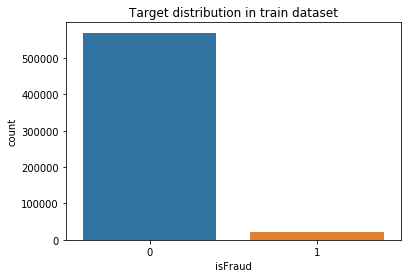

In [85]:
d = sns.countplot(x = 'isFraud', data = train_transaction)
d.set_title('Target distribution in train dataset')